In [1]:
#python 3
%pylab inline

import numpy as np
#from matplotlib.pyplot import plot,scatter,savefig,figure,colorbar,suptitle,close,show,subplot,rgrids, contourf, contour
from matplotlib.mlab import csv2rec
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import DateFormatter
import pickle # works for python 3.x and optimizes speed (works in Python 2.x also, but is relatively slow)
import pandas as pd
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


In [3]:
# patience.  this takes close to a minute
# /davidelvins/Downloads/
# or /inez/DATA/KECK_HOBO/HOBO_Holly/
A=pd.read_pickle('/Users/Eren/Desktop/data/HOBO/HOBOdata.p')

In [4]:
keys=A.keys()
print (keys)
df=pd.DataFrame(A).transpose()   # use sensorID as column heads

dict_keys(['T', 'RH', 'dt'])


In [5]:
df.head()

,32,33,34,35,36,37,38,39,40,41,...,797,798,799,800,803,804,807,808,809,810
RH,"[74.9208668514, 74.9390485727, 74.9279375208, ...","[53.6421923707, 53.9179484769, 54.1563310449, ...","[30.8544350231, 30.9190811432, 31.7281677405, ...","[54.3209766321, 53.8331004442, 54.2926939545, ...","[98.9722538285, 99.0813441562, 99.0136677492, ...","[30.8180715805, 31.017060419, 31.2433218395, 3...","[24.9877996208, 23.1433650057, 24.4797215204, ...","[43.5614380121, 42.713967781, 42.4281107185, 3...","[98.483367545, 97.7480179284, 98.5975083508, 9...","[54.6876413447, 55.4270313438, 56.0704622582, ...",...,"[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ...","[99.8371306286, 99.8371306286, 99.8371306286, ..."
T,"[23.8824626467, 23.9749983232, 24.0675339998, ...","[20.2955127109, 20.4548267107, 20.3632450102, ...","[24.990982813, 25.3391840701, 25.5948496506, 2...","[20.4090358604, 20.52255901, 20.4319312856, 20...","[8.24393331216, 8.363180318, 7.95774049813, 8....","[24.9680873879, 25.2924392438, 25.5252093992, ...","[23.9749983232, 24.459618155, 24.644689508, 24...","[23.6525544194, 23.7221946708, 23.8137763713, ...","[8.02928870164, 8.00543930047, 8.07698750398, ...","[20.3403495851, 20.2497218606, 20.1590941362, ...",...,"[5.10054108576, 5.59014848617, 6.00414084404, ...","[6.00414084404, 5.85858188716, 6.12512491209, ...","[5.00224153047, 6.39166793702, 6.60811599627, ...","[5.90678647678, 5.68750285343, 6.17332950171, ...","[5.05139130812, 6.07692032248, 6.80093435473, ...","[5.10054108576, 5.61472337499, 6.07692032248, ...","[5.83400699834, 5.63929826381, 5.9313613656, 6...","[5.05139130812, 6.75272976512, 6.92097323476, ...","[5.12511597459, 6.17332950171, 6.82456405553, ...","[5.14969086341, 5.63929826381, 6.07692032248, ..."
dt,"[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-02-03 21:15:00, 2012-02-03 21:30:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-02-03 20:45:00, 2012-02-03 21:00:00, 201...","[2012-02-07 12:00:00, 2012-02-07 12:15:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-05-07 16:15:00, 2012-05-07 16:30:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-02-07 00:15:00, 2012-02-07 00:30:00, 201...","[2012-02-03 21:00:00, 2012-02-03 21:15:00, 201...",...,"[2010-01-23 12:12:53, 2010-01-23 12:42:53, 201...","[2010-01-23 11:38:12, 2010-01-23 12:08:12, 201...","[2010-01-23 12:16:56, 2010-01-23 12:46:56, 201...","[2010-01-23 11:41:37, 2010-01-23 12:11:37, 201...","[2010-01-23 12:19:04, 2010-01-23 12:49:04, 201...","[2010-01-23 12:14:57, 2010-01-23 12:44:57, 201...","[2010-01-23 11:39:14, 2010-01-23 12:09:14, 201...","[2010-01-23 12:18:04, 2010-01-23 12:48:04, 201...","[2010-01-23 12:20:02, 2010-01-23 12:50:02, 201...","[2010-01-23 12:13:53, 2010-01-23 12:43:53, 201..."


Construct the dictionary "IDsensor" 

so that the keys are the sensor ID number, the values are a tuple of (tree name, tree specifics). 

For example:
IDsensor['798']=('Kevin','1-1')

In [6]:
#this dictionary has sensor IDs as keys, and (treename,tree specifications) as values
#for example, IDsensor['798']=('Kevin,'1-1')
IDsensor={'798':('Kevin','1-1'), '807':('Kevin','1-2'), '795':('Kevin','1-3'),  '800':('Kevin','1-4'), 
           '797':('Kevin','2-1'), '810':('Kevin','2-2'), '810':('Kevin','2-3'),  '796':('Kevin','2-4'),
           '799':('S','-1'),      '808':('S','-2'), '803':('S','-3'), '809':('S','-4'),
           '40':('ILean','30m'),  '52':('ILean','25m'), '44':('ILean','20m'),
           '45':('ILean','15m'),  '43':('ILean','10m'), '36':('ILean', '5m'),
           '47':('FT','28m'),     '56':('FT','22m'),  '35':('FT','17m'),
           '41':('FT','12m'), '33':('FT','7m'), '49':('FT','2m'),
           '62':('Ursula','25m'), '58':('Ursula','20m'), '54':('Ursula','15m'),
           '61':('Ursula','10m'), '42':('Ursula','5m'),
           '59':('SMM','17.5m'),'32':('SMM', '15m'), '60':('SMM', '10m'), '48':('SMM','5m'),
           '34':('SMM', '2.5m'), '63':('SMU', '17.5m'),'37':('SMU','15m'),'66':('SMU','10m'),
           '65':('SMU', '7.5m'), '64':('SMU','5m'),
           '39':('Freddie','12m'), '46':('Freddie', '6m'),
           '38':('road between well 6 and well 5','N/A'),
           '57':('near well 15, top of ridge','N/A')}

In [7]:
#write a function to extract the number from a string, so that we can sort the sensors for a tree by its height
import re
def extract_number(s):
    return re.match(r'(-?\d+(\.\d+)?)', s).group(0)
#example:
extract_number('7.5m')

'7.5'

In [8]:
#this function takes the name of a tree, e.g. 'Kevin', and return a list of sensor IDs that measure Kevin. 
def get_tree_sensorIDs(input_treename):
    tree_numbers=[]
    for sensornumber,(treename,treespecs) in IDsensor.items():
        if treename==input_treename:
            tree_numbers.append(sensornumber)
    return tree_numbers
    #tree_numbers_sorted=sorted(tree_numbers) #sort the ID numbers in order. not sure whether useful. 
    #return tree_numbers_sorted
#try this example
get_tree_sensorIDs('Ursula')

['62', '54', '58', '61', '42']

In [9]:
#this function takes the name of a tree, e.g. 'Kevin', and return a list of sensor IDs that measure Kevin.
#the sensor numbers are ordered by height. should use this function if the order of height matters. 
def get_tree_sensorIDs_by_height(input_treename):
    tree_numbers_specs={}
    tree_numbers=[]
    for sensornumber,(treename,treespecs) in IDsensor.items():
        if treename==input_treename: 
            tree_numbers_specs[sensornumber]=float(extract_number(treespecs))
    sorted_by_height=sorted(tree_numbers_specs.items(), key=lambda x: x[1])
    ID_sorted_by_height=[item[0] for item in sorted_by_height]
    return ID_sorted_by_height
#try this example
get_tree_sensorIDs('Ursula')
#note the different in results from the last cell

['62', '54', '58', '61', '42']

In [10]:
#this function grabs the whole dataset corresponding to one specific tree
def get_tree_table(input_treename):
    dfnew=df[get_tree_sensorIDs_by_height(input_treename)]
    #dfnew.columns=[IDsensor[x] for x in list(dfnew.columns.values)]
    return dfnew

In [11]:
#example
dfUrsula=get_tree_table('Ursula')
dfUrsula.head()

,42,61,54,58,62
RH,"[74.8168270018, 74.8016755674, 74.7067265784, ...","[32.3907904719, 32.8524041735, 33.3837144734, ...","[37.3523801923, 37.4958137713, 38.1493456421, ...","[34.7412829962, 34.5180518626, 34.9725948948, ...","[33.2402808943, 34.0008829015, 34.4251230649, ..."
T,"[23.8137763713, 23.8824626467, 23.9978937483, ...","[24.6208401069, 24.8288068851, 25.0606230644, ...","[24.2287559517, 24.3212916282, 24.4825135801, ...","[24.3670824784, 24.5054090052, 24.6675849332, ...","[24.2516513768, 24.4128733287, 24.5979446817, ..."
dt,"[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201..."


In [13]:
#if you want to know what sensors the column names correspond to:
#note the columns are not sorted based on its height; they are sorted by their sensor ID numbers
column_ID_names=[IDsensor[x] for x in list(dfUrsula.columns.values)]
print (column_ID_names)
#note the columns are ordered from low to high in sensor height

[('Ursula', '5m'), ('Ursula', '10m'), ('Ursula', '15m'), ('Ursula', '20m'), ('Ursula', '25m')]


In [18]:
#not all time series have the same length, and we solve this problem here
#this function takes in a tree name, and gives all data about this tree, that span the same time range. 
#if one sensor has a shorter time period of records, then all data from other sensors will also be within this period. 
#this is to deal with the time truncation
from operator import *
def truncated_tree(tree):
    table=get_tree_table(tree)
    timestamp=table.ix['dt']
    startdate=max(timestamp.apply(itemgetter(0)))
    enddate=min(timestamp.apply(itemgetter(-1)))
    print(startdate)
    print(enddate)
    #column_no=len(table.columns)
    def mask_by_range(column):
        #print column
        #print column.ix['dt']
        timemask=(column.ix['dt']>=startdate) & (column.ix['dt']<=enddate)
        return column.apply(itemgetter(timemask))
    return table.apply(mask_by_range)

In [19]:
#example: see how the time-truncated tree data A differs from the original tree data B
A=truncated_tree('Ursula')
B=get_tree_table('Ursula')
print (A.applymap(np.shape))#this shows the size of arrays in each cell in the dataframe
print (B.applymap(np.shape))

2012-05-07 17:00:00
2012-07-22 13:00:00
         42       61       54       58       62
RH  (7281,)  (7281,)  (7281,)  (7281,)  (7281,)
T   (7281,)  (7281,)  (7281,)  (7281,)  (7281,)
dt  (7281,)  (7281,)  (7281,)  (7281,)  (7281,)
         42        61        54        58        62
RH  (7281,)  (12551,)  (12552,)  (12552,)  (12551,)
T   (7281,)  (12551,)  (12552,)  (12552,)  (12551,)
dt  (7281,)  (12551,)  (12552,)  (12552,)  (12551,)


In [367]:
#now we work on the temperature row for tree Ursula
truncated_Ursula=truncated_tree('Ursula')
truncated_Ursula.head()
Ursula_T=truncated_Ursula.iloc[[1]]
Ursula_T.head()

,42,61,54,58,62
T,"[23.8137763713, 23.8824626467, 23.9978937483, ...","[24.6208401069, 24.8288068851, 25.0606230644, ...","[24.2287559517, 24.3212916282, 24.4825135801, ...","[24.3670824784, 24.5054090052, 24.6675849332, ...","[24.2516513768, 24.4128733287, 24.5979446817, ..."


In [368]:
#expand this dataframe, so that computation is easier
UrsulaT=pd.DataFrame(zip(*map(lambda a: a.tolist(), Ursula_T.values[0].tolist())), columns=Ursula_T.columns)
UrsulaT.head()

,42,61,54,58,62
0,23.813776,24.620840,24.228756,24.367082,24.251651
1,23.882463,24.828807,24.321292,24.505409,24.412873
2,23.997894,25.060623,24.482514,24.667585,24.597945
3,24.090429,25.199904,24.597945,24.828807,24.736271
4,24.136220,25.222799,24.690480,24.898447,24.805911


In [369]:
#define a function to calculate anomaly
#can define a standard deviation the same way, so that the next step can call this function
def do_anomaly(row):
    return row-np.mean(row)


In [370]:
#Calculate the anomaly. the mean is calculated at each time step, as in the original iPythonNotebook
#why isn't the mean a personal mean? what information does a time-step anomaly tell us?
Ursula_anomaly=UrsulaT.apply(do_anomaly,axis=1)
Ursula_anomaly.head()


,42,61,54,58,62
0,-0.442645,0.364419,-0.027665,0.110661,-0.004770
1,-0.507706,0.438638,-0.068877,0.115240,0.022705
2,-0.563418,0.499311,-0.078798,0.106273,0.036633
3,-0.600242,0.509232,-0.092726,0.138136,0.045600
4,-0.614551,0.472027,-0.060291,0.147675,0.055140


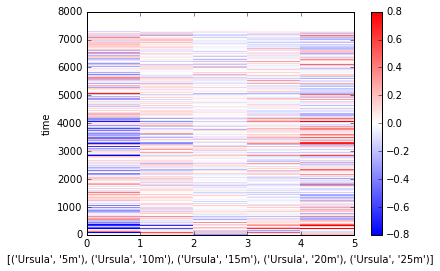

In [379]:
#plotting the time-step anomaly, aka at each time, how much colder/warmer is a specific height compared to the whole tree
plt.pcolor(Ursula_anomaly,vmin=-0.8,vmax=0.8,cmap='bwr')
plt.xlabel(column_ID_names)
plt.ylabel('time')
plt.colorbar()

this plot basically says: 
    
lower in a tree is cooler

in summer(July), this difference is more obvious than in fall (September)

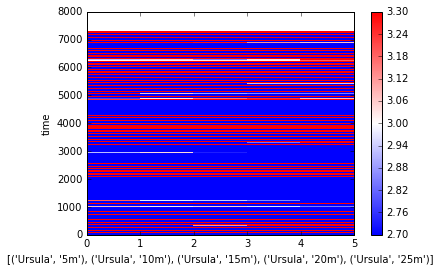

In [386]:
#showing personal anomaly at each sensor height
Ursula_anomaly_personal=UrsulaT.apply(do_anomaly,axis=0)
plt.pcolor(Ursula_anomaly_personal,vmin=3,vmax=3,cmap='bwr')
plt.xlabel(column_ID_names)
plt.ylabel('time')
plt.colorbar()

this plot says:
    
some days are really cold

lower level is less influenced by temperature change; you see more white lines to the left. 